In [3]:
import pandas as pd

import sys 
sys.path.append('..')
from part2.search_yt import YT_searcher
YT = YT_searcher() 
from part1.title_builder2 import build_subtitles  # the whole algorithm is below

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

Ngrams base loaded


# Search in YouTube for subtitles

In [4]:
search = 'building stairs for house'
ids, dfs = YT.search(search, 2)

## We searched max 2 results and taking a longest

In [5]:
dfs[1]

,text,start,duration
0,hey what's up everybody welcome back to\nthe c...,0.030,3.270
1,today's video I wanted to make a quick\none ju...,3.300,6.089
2,you make a stair stringers one as a\ntemplate ...,9.389,5.130
3,you guys through how I did that how I\nfigured...,14.519,4.350
4,know some real simple math that'll make\nyour ...,18.869,3.211
...,...,...,...
178,sure if this was helpful to you if you\nguys e...,1216.220,3.870
179,subscribe button and follow along with\nwhat w...,1220.090,3.060
180,exciting things coming and 2020 is\nshaping up...,1223.150,4.230
181,see you guys later thank you for the\nsupport ...,1227.380,6.870


### Frequency calculation
> The algorithm calculates the frequency of words in documents and divides it by the frequency from the Google ngrams database. To calculate the important points for our document. Create a large table with the size of the number of tokens X the number of words.
Then, using the "window", we calculate the frequency of words in the window segment. At the output, we get several tables with frequencies, and the most popular words.

In [6]:
data = build_subtitles([list(dfs[1]['text'])], window=100, max_words=10)

Parsing ngrams frequencies
00.00%
 0 with problems ['am']
 Done          i = 0
window = 100


In [7]:
data[0].keys()

dict_keys(['app_freq', 'app_freq_f', 'app_freq_w', 'most_app', 'most_words'])

### Algorith calculate frequency and divide it by frequency from Google-ngrams

<AxesSubplot:>

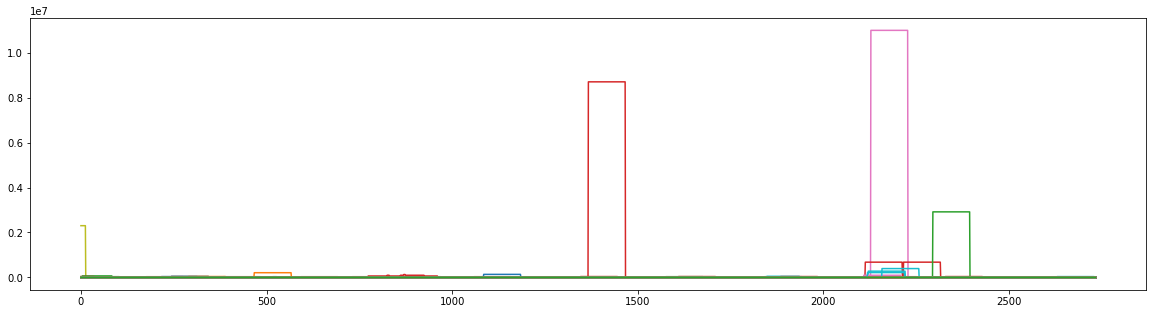

In [8]:
data[0]['app_freq'].plot(figsize=(20, 5), legend=None)

In [9]:
data[0]['app_freq'].round(3)

'jt' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
data[0]['app_freq_f']

,1/10,1/16,1/32,10,110,12,14,15,16,2020,...,works,worry,worse,would,yeah,year,yep,you,your,yours
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clustering in K-Means in to 'n' parts. Using dataset with One Hot encoding to most relevant words

In [14]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data[0]['app_freq_f'])
kmeans.labels_[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

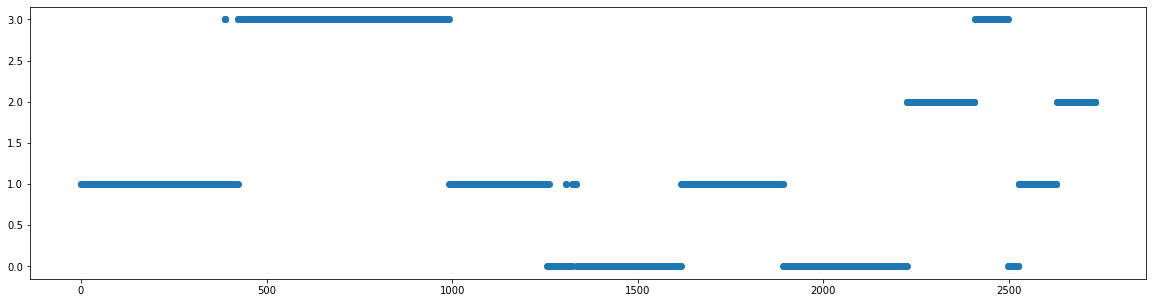

In [17]:
plt.figure(figsize=(20, 5))
plt.scatter(x=range(data[0]['app_freq_f'].shape[0]), y=kmeans.labels_)

>_**In the figure, along the X axis, the entire text is in length. Y-axis cluster**_

## Let's compare the frequent words in each group with our query.

In [59]:
n_clusters
for i in range(n_clusters):
    groups = []
    rows = data[0]['app_freq_f'].loc[kmeans.labels_ == i].reset_index()
    for j in range(rows.shape[0]):
        cols = rows.loc[j] == 1
        groups.extend(rows.columns[cols])
    data[0][f'clus{i}_words'] = list(set(groups))

In [64]:
data[0]['clus1_words'][:10]

['cutting',
 'putting',
 'accurate',
 'flush',
 'dying',
 'hey',
 'blast',
 'apps',
 'stringer',
 'safety']

## Importing NN model to calculate cosine difference

In [48]:
import spacy
# spacy english model (large)
nlp = spacy.load('en_core_web_lg')

def similarity_calc(search_words, subtitles):
    search = nlp(search_words)
    sim = search.similarity(nlp(' '.join(subtitles)))
    return sim

In [61]:
for i in range(n_clusters):
    data[0][f'clus{i}_similarity'] = similarity_calc(search, data[0][f'clus{i}_words'])
    print(f'Cluster {i} similarity:', data[0][f'clus{i}_similarity'])

Cluster 0 similarity: 0.6402286910171108
Cluster 1 similarity: 0.6582080100161593
Cluster 2 similarity: 0.6233395698177725
Cluster 3 similarity: 0.6469294308297406


# build_subtitles

In [ ]:
import numpy as np
import pandas as pd
import re
from spacy.lang.en import English
nlp = English()

from ngrams import Word_Frequency
ngrams = Word_Frequency()



# IN: text
# OUT: subtitles

def build_subtitles(text, window=None, max_words=10):

    if type(text) == str:
        text = [text]

    # Remove punctuation
    for t in range(len(text)):
        if type(text[t]) == list:
            text[t] = ' '.join(text[t])
        text[t] = text[t].replace('\n',' ').replace('\t','').replace("'s ",' ').replace("'ll ",' will ').replace("'re ", ' are ').replace("n't ", ' not ').replace("'ve ", " have ").replace("'m", " am")
        text[t] = re.sub('[,\.!?]', '', text[t])
        text[t] = re.sub('[_-]', ' ', text[t])
        text[t] = re.sub('(\s){2,8}', ' ', text[t])
        text[t] = text[t].rstrip().lstrip()
        # Convert the titles to lowercase
        text[t] = text[t].lower()

    # dictionary
    docs = []
    for doc in text:
        tt = doc.split(' ')
        docs.append(tt)
    del(tt, text)

    dict_words = dict()
    doc_words = []
    for doc in docs:
        num_words = 0
        for word in doc:
            if not len(word) > 0:
                continue
            if word in dict_words:
                dict_words[word] += 1
            else:
                dict_words[word] = 1
            num_words += 1
        doc_words.append(num_words)


    # building frequencies
    total_words = sum(doc_words)
    dict_freq = dict()
    ngrams_freqs = ngrams.get_frequency(dict_words.keys())
    for i,key in enumerate(dict_words.keys()):
        if ngrams_freqs[i] == 0:
            dict_freq[key] = dict_words[key] / total_words
        else:
            dict_freq[key] = ngrams_freqs[i]


    # # Spacy not delete '.' '\n'
    # docs = []
    # for doc in text:
    #     docs.append([token.text for token in nlp(doc)])
    #
    # dict_words = dict()
    # doc_words = [len(doc) for doc in docs]


    # accumulative table
    word2row = dict()
    row2word = dict()
    array_freqs = np.zeros((len(dict_words)))
    for i,word in enumerate(sorted(dict_words.keys())):
        word2row[word] = i
        row2word[i] = word
        array_freqs[i] = dict_freq[word]

    # [num docs, word, possition in doc] => (0,1)
    table_appearance = [np.zeros((len(dict_words), doc_len)) for doc_len in doc_words]
    for d,doc in enumerate(docs):
        possition = 0
        for word in doc:
            table_appearance[d][word2row[word], possition] += 1
            possition += 1

    # calculating frequency of words in window
    if not window:
        window = int(total_words/len(docs)/5)
    print(f'{window = }')

    table_appearance_freq = [np.zeros((table.shape[0], table.shape[1]-window)) for table in table_appearance]
    for d, table in enumerate(table_appearance):
        for i in range(table.shape[1]-window):
            table_appearance_freq[d][:,i] = (table[:,i:i+window].sum(axis=1) / window) / array_freqs


    # choising best words
    table_most_appearance = [[[best for best in np.argsort(-step)[:max_words]] for step in doc.T] for doc in table_appearance_freq]
    table_most_appearance_words = [[[row2word[ind] for ind in step] for step in doc] for doc in table_most_appearance]


    data = [{'app_freq':0, 'app_freq_f':0, 'app_freq_w':0, 'most_app':0, 'most_words':0} for _ in range(len(docs))]
    # save results to csv
    for i,table in enumerate(table_appearance_freq):
        dataset = pd.DataFrame(table.T, columns=word2row.keys())
        dataset.to_csv(f'result_words_{i}.csv', index=None)
        data[i]['app_freq'] = dataset

        # dataset with One Hot encoding for most frequent words
        dataset_filtered = dataset.copy(True)
        for j in range(dataset_filtered.shape[0]):
            limit = sorted(dataset_filtered.loc[j], reverse=True)[max_words]
            dataset_filtered.loc[j] = (dataset_filtered.loc[j] > limit) * 1
        data[i]['app_freq_f'] = dataset_filtered.fillna(0)


    for i,table in enumerate(table_most_appearance):
        dataset = pd.DataFrame(table, columns=[str(x) for x in range(1,max_words+1)])
        dataset.to_csv(f'result_best_ind_{i}.csv', index=None)
        data[i]['most_app'] = dataset

    for i,table in enumerate(table_most_appearance_words):
        dataset = pd.DataFrame(table, columns=[str(x) for x in range(1,max_words+1)])
        dataset.to_csv(f'result_best_words_{i}.csv', index=None)
        data[i]['most_words'] = dataset


    # print(dataset)
    # print(dict_words['woke']/total_words, ngrams.get_frequency(['woke']))
    return data



if __name__ == '__main__':

    q = 2

    if q == 1:
        with open('../data_test/kb04.cha', 'r') as f:
            file1 = f.readlines()

    else:
        file1 = pd.read_csv('../data_test/text.csv')
        file1 = list(file1['text'])

    build_subtitles([file1], window=30, max_words=10)
    print(ngrams)



# ngrams

In [ ]:
import sqlite3 as sql
import os
import numpy as np
import pandas as pd
import requests
from time import sleep
import re

class Word_Frequency():
    def __init__(self):
        self.path2db = os.path.abspath(os.path.join( os.path.abspath(__file__), os.pardir, 'ngrams.db'))
        if not os.path.isfile(self.path2db):
            con = sql.connect('ngrams.db')
            command = 'CREATE TABLE word_freq (word TEXT UNIQUE NOT NULL, frequency INTEGER NOT NULL)'
            con.execute(command)
            con.close()
            print('table ngrams created')

        self.load_db()


    def load_db(self):
        con = sql.connect(self.path2db)
        con.row_factory = sql.Row
        cur = con.cursor()
        cur.execute('SELECT * FROM word_freq ORDER BY word')
        self.ngrams = {x[0]:x[1] for x in cur.fetchall()}

        self.tokens = set(self.ngrams.keys())
        print('Ngrams base loaded')
        con.close()


    # databese name, columns names, list of data
    def insert_to_db(self, data: list):

        command = 'INSERT OR IGNORE INTO word_freq (word, frequency) VALUES (?,?)'

        insert_data = []
        if type(data[0]) == tuple:
            for dd in data:
                insert_data.append(dd)
        elif type(data[0]) == list:
            for dd in data:
                insert_data.append(tuple(dd))
        elif type(data[0]) == dict:
            for dd in data:
                tt = tuple()
                for col in cols:
                    tt += (dd[col],)
                insert_data.append(tt)

        con = sql.connect(self.path2db)
        cur = con.cursor()

        if len(insert_data) > 1:
            cur.executemany(command, insert_data)
        else:
            cur.execute(command, insert_data[0])

        con.commit()
        con.close()

        # print('info added to DB')


    def get_frequency(self, tokens: list):
        freqs = np.zeros((len(tokens)))
        need2parse = []
        need2parse_ind = []
        for i, token in enumerate(tokens):
            if token in self.tokens:
                freqs[i] = self.ngrams[token]
            else:
                need2parse.append(token)
                need2parse_ind.append(i)

        # all words found in our base
        if len(need2parse_ind) == 0:
            return freqs

        new_freqs = self.parse_ngrams(need2parse)
        to_db = []
        for k,i in enumerate(need2parse_ind):
            freqs[i] = new_freqs[k]
            if freqs[i] != 0:
                to_db.append((need2parse[k], new_freqs[k]))
                self.ngrams[need2parse[k]] = new_freqs[k]

        self.tokens = set(self.ngrams.keys())

        # to db
        if len(to_db) > 0:
            self.insert_to_db(to_db)

        return freqs



    def parse_ngrams(self, tokens):

        freqs = np.zeros((len(tokens)))

        n_words = 12
        start = 0
        stop = int(len(tokens) / n_words + 1)
        step = n_words
        num_problems = 0
        print('Parsing ngrams frequencies')
        print('00.00%', end='')
        for i in np.arange(start, stop, 1):
            if (i + 1) * n_words > len(tokens):
                step = len(tokens) - i * n_words
            try:
                freqs[i * n_words:i * n_words + step] = self._parse_frequency(tokens[i * n_words:i * n_words + step])
                num_problems = 0
            except:
                print('\n', i, 'with problems', tokens[i * n_words:i * n_words + step])
                num_problems += 1
                if num_problems >= 3:
                    break

            sleep(3)
            print('\r{:2.2f}%          i = {}'.format(i / stop * 100, i), end='')

            if (i + 1) % 30 == 0:
                print('\r{:2.2f}% sleeping i = {}'.format(i / stop * 100, i), end='')
                sleep(70)
        print('\r Done')
        return freqs

    # Getting frequency for each word from google ngrams viewer
    def _get_massive(self, html):
        return re.search(r'ngrams\.data.+\]\}\]', html)

    def _get_data_f_script(self, r_e):
        freqs = re.findall(r'(\d\.\d+\w-\d+|\d+\.\d+|\d+)\]\}', r_e.group(0))
        freqs_d = np.zeros(len(freqs))
        for i in range(len(freqs_d)):
            freqs_d[i] = float(freqs[i])
        return freqs_d

    # input: massive of words
    def _parse_frequency(self, words):
        if (type(words) == list or type(words) == np.ndarray) and len(words) > 1:
            words = '%2C'.join(words)
        url = 'https://books.google.com/ngrams/graph?content={}&year_start=1999&year_end=2000&corpus=15&smoothing=3'.format(
            words)

        html = requests.get(url)
        gm = self._get_massive(html.text)

        return self._get_data_f_script(gm)

    def __repr__(self):
        rep = f'dict size: {len(self.tokens)}\n'
        for i, key in enumerate(self.tokens):
            if i == 100:
                rep += '  ...  '
                break
            else:
                rep += f'"{key}": {self.ngrams[key]:1.9f}\n'
        return rep



if __name__ == '__main__':
    nn = Word_Frequency()
    words = ['mother','whatever','sit','lots of','froglets','picks','wading','apart',
 'from', 'one', 'say', 'goodbye']
    freqs = nn.get_frequency(words)
    print([a for a in zip(words, freqs)])
    print(nn._parse_frequency(words))
